In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

from datasets import load_dataset

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Dropping duplicating rows
df_unique = df.drop_duplicates().copy()

# Data cleaning
df_unique['job_posted_date'] = pd.to_datetime(df_unique['job_posted_date'])
df_unique['job_skills'] = df_unique['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter data for US only
df_DA_US = df_unique[(df_unique['job_country']== 'United States') & (df_unique['job_title_short'] == 'Data Analyst')].copy()

In [3]:
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [4]:
# Splitting the job_skills list into individual rows
df_DA_US_exploded = df_DA_US.explode('job_skills')

In [5]:
df_DA_US_pivot = df_DA_US_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

In [6]:
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

In [7]:
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [8]:
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

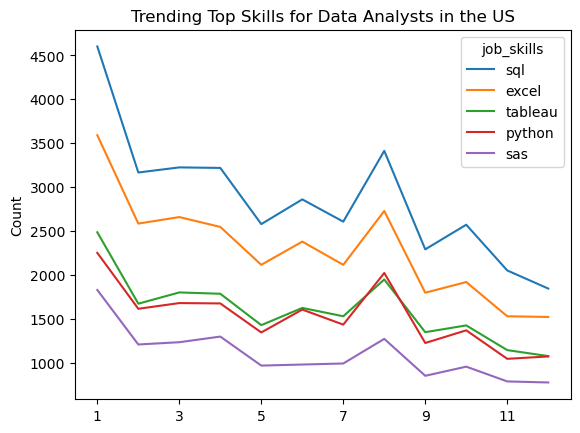

In [11]:
df_DA_US_pivot.iloc[:,:5].plot(kind='line')
plt.title('Trending Top Skills for Data Analysts in the US')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [12]:
# Monthly Data analyst job posting totals in the US
df_DA_US_Total = df_DA_US.groupby('job_posted_month_no').size()

In [23]:
# Divide the rows of df_DA_US_pivot by df_DA_US_Total for the top 5 skills only.
df_DA_US_percent = df_DA_US_pivot.iloc[:,:5].div(df_DA_US_Total/100, axis=0) # axis = 0 row-wise, 1 column-wise

In [24]:
# sort job_posted_month_name in df_US_pivot by job_posted_month value
# changes month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month')
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

In [25]:
df_plot = df_DA_US_percent.copy()

In [26]:
df_plot

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.469923,41.157847,29.413538,30.529172,19.237148
Sep,49.460975,38.831393,29.150496,26.498491,18.456231


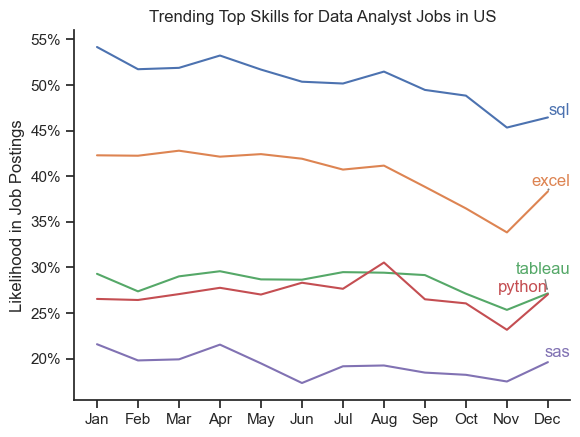

In [27]:
from matplotlib.ticker import PercentFormatter
from adjustText import adjust_text

sns.set_theme(style='ticks')
# sns.lineplot(data=df_plot, dashes=False)
lines = sns.lineplot(data=df_plot, dashes=False)
sns.despine()
plt.title('Trending Top Skills for Data Analyst Jobs in US')
plt.xlabel('')
plt.ylabel('Likelihood in Job Postings')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.legend().remove()
texts=[]
for i, line in enumerate(lines.get_lines()):
    if i < len(df_plot.columns):
        colour = line.get_color()
        texts.append(plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i], color=colour))  
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()